In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [102]:
#reading the data
iris=pd.read_csv(r"C:\Users\manis\Downloads\iris.data",header=None)

In [109]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
#assigning column header names from the iris.data file
col=['Sepal_length','Sepal_width','Petal_length','Petal_width','species']
iris.columns=col

In [107]:
iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
##total number of rows and columns in the dataset
iris.shape

(150, 5)

####  Univariate-analysis

In [128]:
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

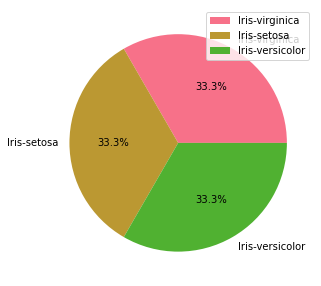

In [127]:
plt.figure(figsize=(5,5))
plt.pie(iris['species'].value_counts(),labels=iris['species'].value_counts().index,autopct="%1.1f%%")
plt.legend(loc='upper right')

     1.Our dataset is balanced with equal records for all three species.
     2.we shouldn’t delete the entries as it might imbalance the data sets and hence will prove to be less useful for 
       valuable insights

array([[<AxesSubplot:title={'center':'Sepal_length'}>,
        <AxesSubplot:title={'center':'Sepal_width'}>],
       [<AxesSubplot:title={'center':'Petal_length'}>,
        <AxesSubplot:title={'center':'Petal_width'}>]], dtype=object)

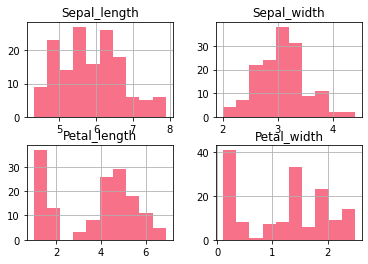

In [136]:
iris.hist()

   #### Bivartiate-analysis

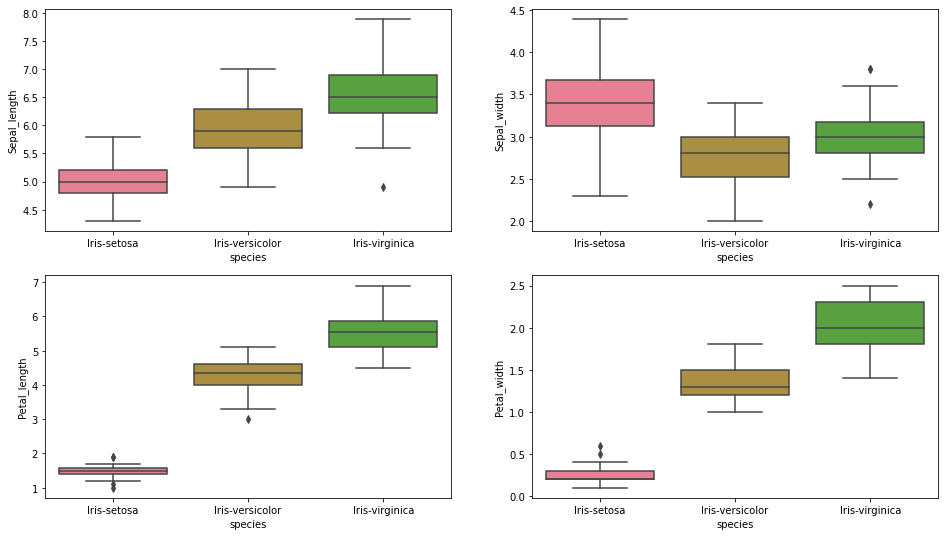

In [110]:
##boxplot to see the distribution of 'species' with the other variables
fig, ax = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='Sepal_length', x= 'species', data=iris, orient='v' , ax=ax[0, 0])
sns.boxplot( y='Sepal_width', x= 'species', data=iris, orient='v' , ax=ax[0, 1])
sns.boxplot( y='Petal_length', x= 'species', data=iris, orient='v' , ax=ax[1, 0])
sns.boxplot( y='Petal_width', x= 'species', data=iris, orient='v' , ax=ax[1, 1])
plt.show()


     1.Setosa is having smaller feature and less distributed

     2.Versicolor is distributed in a average manner and average features

     3.Virginica is highly distributed with large no .of values and features

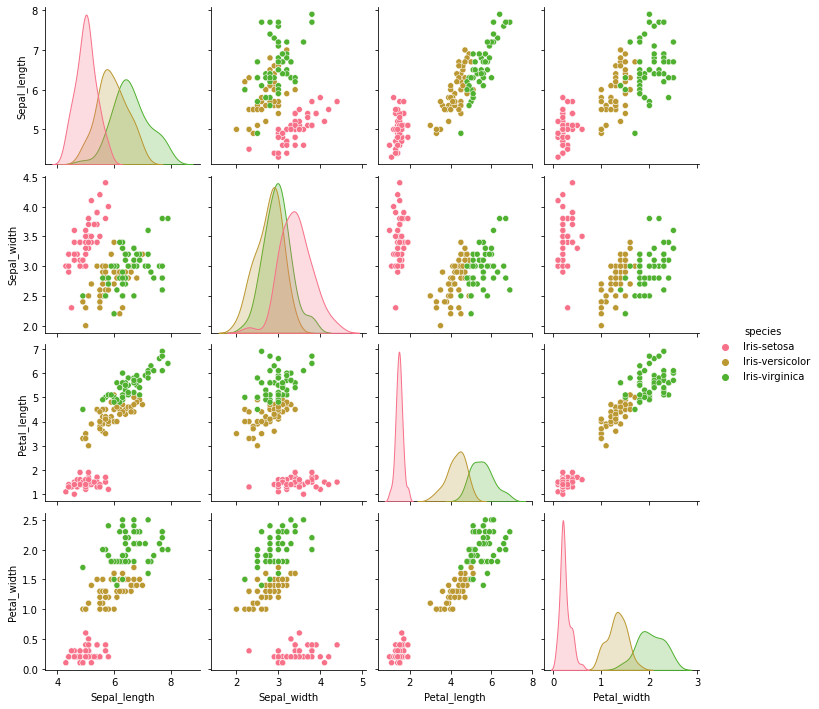

In [92]:
sns.pairplot(data=iris,hue='species')

1.High co relation between petal length and width columns.

2.Setosa has both low petal length and width

3.Versicolor has both average petal length and width

4.Virginica has both high petal length and width.

5.Sepal width for setosa is high and length is low.

6.Versicolor have average values for for sepal dimensions.

7.Virginica has small width but large sepal length

[]

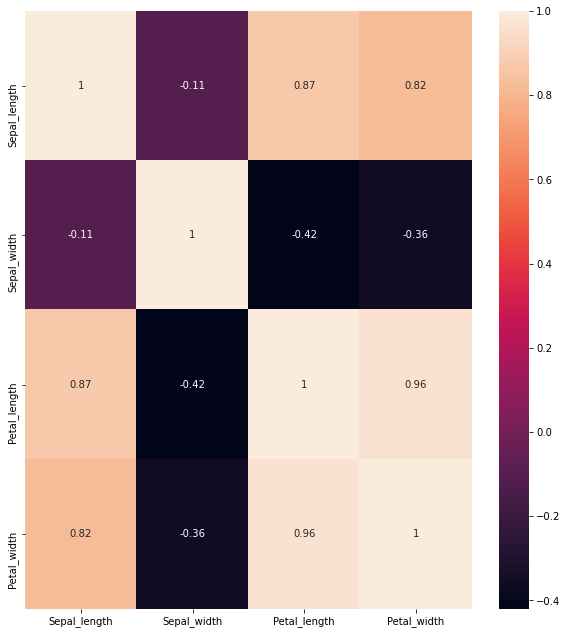

In [144]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

    1.Sepal Length and Sepal Width features are slightly correlated with each other

   ## Modelling

In [139]:
X=iris.drop('species',axis=1)
y=iris['species']


In [143]:
#diving the data between train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

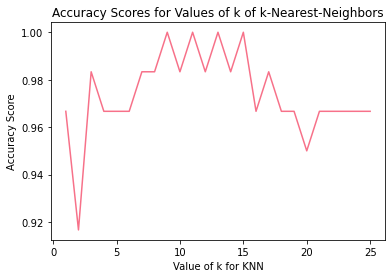

In [141]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [142]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


#### Choosing KNN to Model Iris Species Prediction with k = 15


In [101]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
print('The predicted species of new iris flower is:', knn.predict([[6, 2, 4, 2]]))

The predicted species of new iris flower is: ['Iris-versicolor']


C:\Users\manis\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
